[Tabular Playground Series - Jan 2021](https://www.kaggle.com/c/tabular-playground-series-jan-2021/discussion/210482)に取り組む。

## ライブラリのインポート、データの読み込み

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [3]:
test.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


## データの観察
### 各種統計量の算出

In [4]:
train.iloc[:,1:].describe()

# 訓練データについて
# targetの値は概ね7~9だが、最小値は0,最大値は10.267と、外れ値も存在する。
# 特徴量はどれも0.3~0.7程度でまとまっている。ただし、1を超えたり0を下回ることもある

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [5]:
test.iloc[:,1:].describe()

# テストデータについて
# 特徴量の記述統計量はほぼ訓練データと変わらない

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.507222,0.498080,0.521381,0.514801,0.502274,0.526987,0.487722,0.525284,0.460257,0.520478,0.484187,0.506763,0.554390,0.503174
std,0.204220,0.227866,0.200656,0.232995,0.220812,0.218145,0.180805,0.216084,0.197217,0.201645,0.219972,0.218598,0.229730,0.208333
min,-0.061638,-0.030548,0.040867,0.153318,0.276679,0.075104,-0.024760,0.219631,-0.231308,-0.109759,0.078859,0.094504,0.015367,0.164500
25%,0.343649,0.322703,0.344251,0.294361,0.284113,0.356357,0.347336,0.342148,0.330739,0.375496,0.301236,0.310875,0.350956,0.308210
50%,0.484292,0.553147,0.551413,0.482019,0.451960,0.471000,0.466392,0.483781,0.416900,0.458622,0.442037,0.485527,0.491538,0.431124
75%,0.644079,0.686518,0.648656,0.747133,0.670831,0.694422,0.580666,0.685070,0.575248,0.700157,0.677691,0.694630,0.769323,0.712664
max,1.017577,0.853813,1.001791,0.997446,1.033722,1.046715,1.054225,1.026280,1.001405,1.140639,1.023151,1.049417,0.977223,0.868679


### ヒストグラムを描画

cont1~14,targetのヒストグラムを描画することで分布の形状を確かめる。

cont1~14はいずれも記述統計量はあまり変わらなかったが、それぞれ異なる分布の特徴を持つことがわかった。

targetは[Bimodal distribution](https://en.wikipedia.org/wiki/Multimodal_distribution)に従う。どのデータも多峰なので、ガウス混合モデルが使えそうだ。

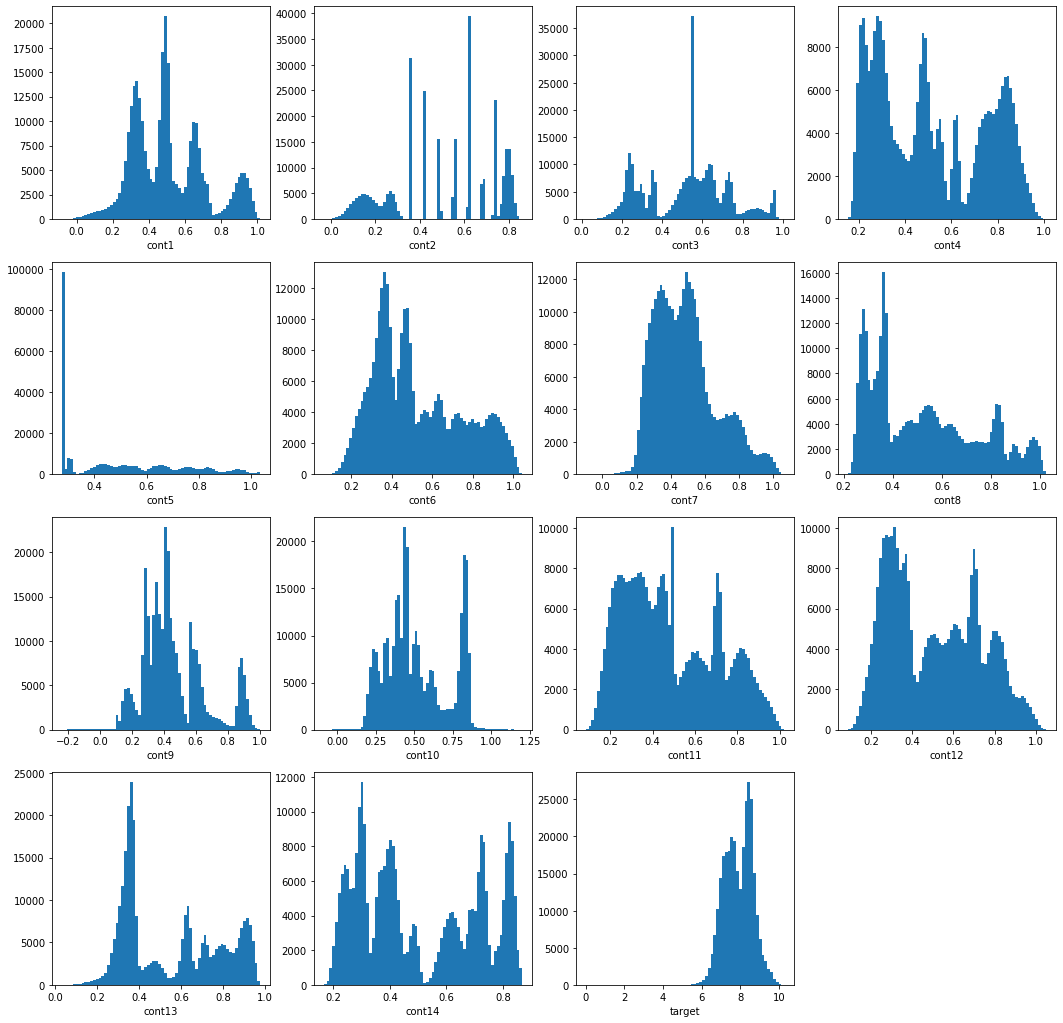

In [6]:
import math
fig = plt.figure(figsize = (18,18))
n_bins = 70

ax1 = fig.add_subplot(4,4,1)
ax1.hist(train['cont1'], n_bins)
ax1.set(xlabel = 'cont1')

ax2 = fig.add_subplot(4,4,2)
ax2.hist(train['cont2'], n_bins)
ax2.set(xlabel = 'cont2')

ax3 = fig.add_subplot(4,4,3)
ax3.hist(train['cont3'], n_bins)
ax3.set(xlabel = 'cont3')

ax4 = fig.add_subplot(4,4,4)
ax4.hist(train['cont4'], n_bins)
ax4.set(xlabel = 'cont4')

ax5 = fig.add_subplot(4,4,5)
ax5.hist(train['cont5'], n_bins)
ax5.set(xlabel = 'cont5')

ax6 = fig.add_subplot(4,4,6)
ax6.hist(train['cont6'], n_bins)
ax6.set(xlabel = 'cont6')

ax7 = fig.add_subplot(4,4,7)
ax7.hist(train['cont7'], n_bins)
ax7.set(xlabel = 'cont7')

ax8 = fig.add_subplot(4,4,8)
ax8.hist(train['cont8'], n_bins)
ax8.set(xlabel = 'cont8')

ax9 = fig.add_subplot(4,4,9)
ax9.hist(train['cont9'], n_bins)
ax9.set(xlabel = 'cont9')

ax10 = fig.add_subplot(4,4,10)
ax10.hist(train['cont10'], n_bins)
ax10.set(xlabel = 'cont10')

ax11 = fig.add_subplot(4,4,11)
ax11.hist(train['cont11'], n_bins)
ax11.set(xlabel = 'cont11')

ax12 = fig.add_subplot(4,4,12)
ax12.hist(train['cont12'], n_bins)
ax12.set(xlabel = 'cont12')

ax13 = fig.add_subplot(4,4,13)
ax13.hist(train['cont13'], n_bins)
ax13.set(xlabel = 'cont13')

ax14 = fig.add_subplot(4,4,14)
ax14.hist(train['cont14'], n_bins)
ax14.set(xlabel = 'cont14')

ax15 = fig.add_subplot(4,4,15)
ax15.hist(train['target'], n_bins)
ax15.set(xlabel = 'target')

plt.show()

targetを単峰の分布として扱って最尤推定してしまうと比較的疎になっている8あたりに大きな確率を割り当てることになってしまう。試しにシンプルな線形回帰をやってみたが8.0あたりの推定値しか出さなかった。そこで、contとtargetの同時分布が

$$
p(target,cont) = \sum_{k=1}^K\pi_kN(\boldsymbol{\mu}_k,\boldsymbol{\Sigma}_k^2), \ \ \ \ \ \ \ \ s.t.\ \ \sum_{k=1}^K\pi_k=1
$$

なる混合ガウス分布に従うとして、事後分布$p(target|cont)$を求めることにする。

今回は[このサイト](https://cpp-learning.com/gmr/)を参考にGMRを行う。

[パッケージ](https://github.com/AlexanderFabisch/gmr)はコマンドで

```
$pip install git+https://github.com/AlexanderFabisch/gmr.git

```

と入力することで使用できるようになる。

## 推定

In [11]:
from gmr import GMM
import math

# 訓練データ
n = 100 #サンプル数の指定

train_Xt = train.iloc[:n, 1:].values # contを並べた行列Xとtargetベクトルtを並べた行列
train_X = train.iloc[:n, 1:-1].values # contを並べた行列
train_t = train.iloc[:n, -1].values # targetを並べたベクトル

valid_Xt = train.iloc[n:n+100, 1:].values
valid_X = train.iloc[n:n+100, 1:-1].values
valid_t = train.iloc[n:n+100, -1].values

# 最適化
BIC = []
MSE = []
for K in range(2, 100):
    gmm = GMM(n_components = K)
    gmm.from_samples(train_Xt) # 同時確率の算出
    
    bic = np.sum( np.log(gmm.to_probability_density(train_Xt)) ) - 3 * K * math.log(n) * 1/2 
    # ベイズ情報量基準の計算。to_probability_densityメソッドでモデルの尤度を計算させる。
    # なぜか尤度がとても大きい値になるので本来のBICの符号を反転させた。
    BIC.append(bic / 1000)
    
    x_axis = np.arange(14)
    y = gmm.predict(x_axis, valid_X)
    mse = np.sum((valid_t - y.ravel()) ** 2) / 100
    MSE.append(mse)
    
    print('K: ', K, 'BIC: ', bic / 1000, 'MSE:', mse)

K:  2 BIC:  1.1143618106327349 MSE: 0.8945131373160645
K:  3 BIC:  1.3167257664703185 MSE: 0.9124238059284764
K:  4 BIC:  1.4313698807241189 MSE: 1.1533428226370648
K:  5 BIC:  1.6004102453756495 MSE: 1.625640473536838
K:  6 BIC:  1.7312434440022089 MSE: 2.220464792564133
K:  7 BIC:  1.7809509883811094 MSE: 1.4128006551802879
K:  8 BIC:  1.8529052286398733 MSE: 1.7205119199204173
K:  9 BIC:  1.8789072135615803 MSE: 2.3514923954578757
K:  10 BIC:  1.9397021432853565 MSE: 2.6323659502050503
K:  11 BIC:  1.8571674963659246 MSE: 1.3805667446527954
K:  12 BIC:  1.901889329460983 MSE: 2.5426962755712443
K:  13 BIC:  1.9405866580719404 MSE: 1.5913176634207926
K:  14 BIC:  1.9276864006019843 MSE: 1.7035206575951773
K:  15 BIC:  1.9729822922822833 MSE: 2.316611653515806
K:  16 BIC:  2.0055439427316655 MSE: 1.4323199427708457
K:  17 BIC:  1.9599797068676976 MSE: 2.216041676170304
K:  18 BIC:  1.958583606788403 MSE: 1.588770540179022
K:  19 BIC:  1.9424563975474674 MSE: 1.1855791540318243
K:  20 

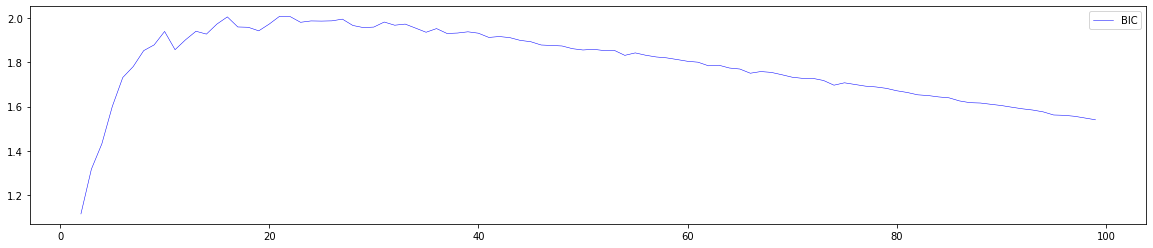

In [12]:
# BICのプロット
plt.figure(figsize = (20,4))
x = np.arange(2,100)
plt.plot(x, BIC, linestyle = '-', color = 'blue', linewidth = 0.5, label = 'BIC')  
plt.legend(loc = 'upper right')
plt.show()

BIC(の符号逆)によるとn_components = 22くらいが最適に見える。

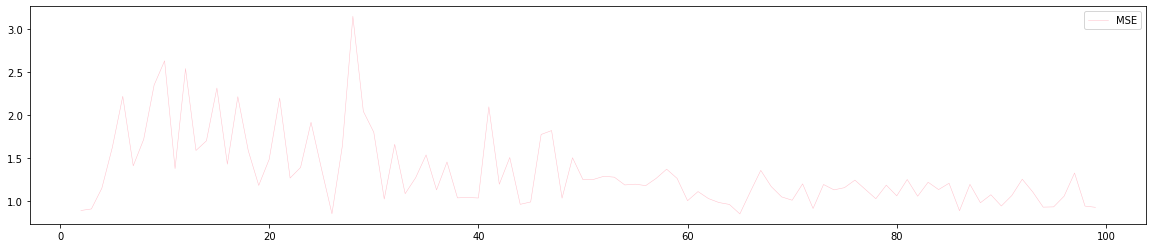

In [13]:
plt.figure(figsize = (20,4))
x = np.arange(2,100)
plt.plot(x, MSE, linestyle = '-', color = 'pink', linewidth = 0.5, label = 'MSE')  
plt.legend(loc = 'upper right')
plt.show()

MSEの挙動が謎。n_componentsが多い方が良いという結果になってしまっているが、今回は計算時間の兼ね合いから22を採用する。

20.538844809265637


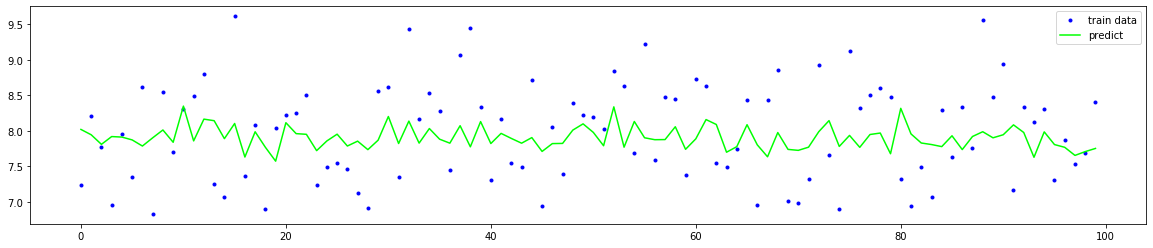

In [43]:
# n_components = 22でデータ数を増やして学習
n = 200000
train_Xt = train.iloc[:n, 1:].values # contを並べた行列Xとtargetベクトルtを並べた行列
train_X = train.iloc[:n, 1:-1].values # contを並べた行列
train_t = train.iloc[:n, -1].values # targetを並べたベクトル

valid_Xt = train.iloc[n:n+100, 1:].values
valid_X = train.iloc[n:n+100, 1:-1].values
valid_t = train.iloc[n:n+100, -1].values

gmm22 = GMM(n_components = 22)
gmm22.from_samples(train_Xt)
x_axis = np.arange(14)
y = gmm22.predict(x_axis, train_X)
print(np.sum((train_t - y.ravel()) ** 2) / 20000) #間違えて/5000

# プロット
plt.figure(figsize = (20,4))
plt.plot(train_t.ravel()[:100], marker = '.', linestyle = 'None', color = 'blue', label = 'train data')
plt.plot(y.ravel()[:100], linestyle = '-', color = 'lime', label = 'predict')
plt.legend(loc = 'upper right')
plt.show()

0.5021288521225395


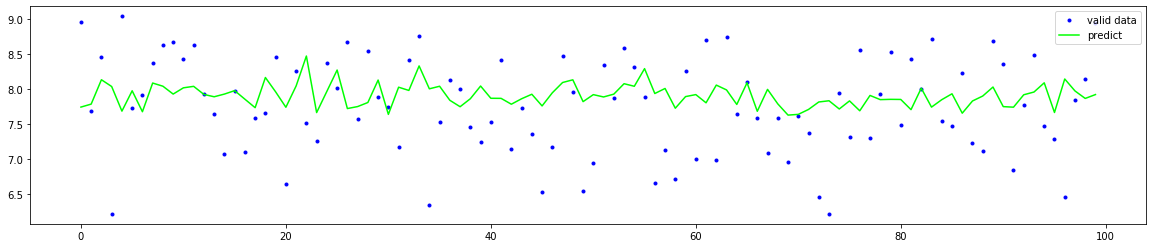

In [44]:
y = gmm22.predict(x_axis, valid_X)
print(np.sum((valid_t - y.ravel()) ** 2) / 100)

plt.figure(figsize = (20,4))
plt.plot(valid_t, marker = '.', linestyle = 'None', color = 'blue', label = 'valid data')
plt.plot(y, linestyle = '-', color = 'lime', label = 'predict')
plt.legend(loc = 'upper right')
plt.show()

## モデルの保存

In [45]:
import pickle

# モデルの保存
pickle.dump(gmm22, open('gmm22', 'wb'))

# 次のコードを実行すれば訓練ずみモデルがロードできる
# gmm20 = pickle.load(open("gmm22", "rb"))

## 提出

提出用のデータを作る

In [46]:
test_X = test.iloc[:, 1:].values
x_axis = np.arange(14)
prediction = gmm22.predict(x_axis, test_X)
print(len(prediction))
pd.DataFrame(pd.Series(prediction.ravel()).describe()).transpose()

200000


,count,mean,std,min,25%,50%,75%,max
0,200000.0,7.905877,0.159678,7.065042,7.79645,7.900498,8.009459,8.773514


In [47]:
submission2 = pd.DataFrame({'id': test['id'], 'target': prediction.ravel()})
submission2.head()

,id,target
0,0,8.111185
1,2,7.651321
2,6,7.927424
3,7,8.009984
4,10,8.198533


In [48]:
submission2.tail()

,id,target
199995,499984,8.064604
199996,499985,8.004065
199997,499987,8.155785
199998,499988,7.999254
199999,499990,7.870157


In [49]:
submission2.to_csv("submission2.csv", index = False)

スコアは0.71809で、1066位/1203チーム　だった